<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/Greek_NLP_example_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP clustering example using Wikipedia articles in greek

In [1]:
# install wikipedia library for downoloading articles
!pip install wikipedia
# install wordcloud library for visualization of clusters
!pip install wordcloud

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=2855b48322c307d887e5dc6291df02c42cebf101e44df78d91b558f862920687
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import wikipedia
from wordcloud import WordCloud

## Download content form wikipedia.
Fell free to change downloaded contents 

In [3]:
# set language to greek
wikipedia.set_lang("el")
# list of articles to download
articles=['Αττική','Κόρινθος','Λάρισα','Θεσσαλονίκη','Θεσσαλία','Ρόδος','Σπάρτη',
          'Ελλάδα','Τουρκία','Γαλλία','Βρετανία','Γερμανία','Ισπανία','Κίνα',
          'Μπάσκετ','Ποδόσφαιρο','Τένις','Κολύμπι','Τρέξιμο',
         'Γεμιστά','Παστίτσιο','Φακές']
# content from articles will be stored in wiki_lst
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("loading complete")

loading content:  Αττική
loading content:  Κόρινθος
loading content:  Λάρισα
loading content:  Θεσσαλονίκη
loading content:  Θεσσαλία
loading content:  Ρόδος
loading content:  Σπάρτη
loading content:  Ελλάδα
loading content:  Τουρκία
loading content:  Γαλλία
loading content:  Βρετανία
loading content:  Γερμανία
loading content:  Ισπανία
loading content:  Κίνα
loading content:  Μπάσκετ
loading content:  Ποδόσφαιρο
loading content:  Τένις
loading content:  Κολύμπι
loading content:  Τρέξιμο
loading content:  Γεμιστά
loading content:  Παστίτσιο
loading content:  Φακές
loading complete


In [0]:
#gr_stop_wd is a list containing greek stopwords that will be omittied from our analysis
gr_stop_wd=[u'ο',u'η',u'το','τα','τη','την','τις','και','είναι','στο','στη',
            'στην','για','με','σε','του','τον','τους','των','οι','να','στα',
            'που','αν','της','έχει','έχουν','ότι','ως','από','κατά','ένα',
            'στις','μια','ήταν']

In [5]:
#Execute term frequency - inverse document frequency (Tf-Idf) analysis on downloaded content
vectorizer = TfidfVectorizer(stop_words=gr_stop_wd)
X = vectorizer.fit_transform(wiki_lst)
#result is a scipy sparse matrix
print(X.shape)

(22, 19575)


## Next we perform cluster using k-means
The first step is to use the eldow metoh to decide on the number of clusters

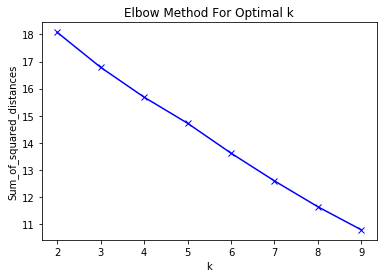

In [9]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=20)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Due to the small number of texts, selecting the best number of clusters based on elbow method is not very clear. A small elbow exists of k=4 clusters.
Next, we perform clustering into 4 clusters.

In [11]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=20)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

          title  cluster
19      Γεμιστά        0
20    Παστίτσιο        0
10     Βρετανία        1
13         Κίνα        1
12      Ισπανία        1
11     Γερμανία        1
9        Γαλλία        1
7        Ελλάδα        1
8       Τουρκία        1
0        Αττική        2
5         Ρόδος        2
4      Θεσσαλία        2
3   Θεσσαλονίκη        2
2        Λάρισα        2
1      Κόρινθος        2
6        Σπάρτη        2
21        Φακές        2
14      Μπάσκετ        3
15   Ποδόσφαιρο        3
16        Τένις        3
17      Κολύμπι        3
18      Τρέξιμο        3


###Finally, we visualize the clusters by creating a wordcloud for each one of them

Cluster: 0
Titles
   Γεμιστά
 Παστίτσιο


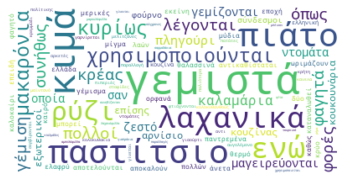

Cluster: 1
Titles
      Αττική
    Κόρινθος
      Λάρισα
 Θεσσαλονίκη
       Ρόδος
      Σπάρτη


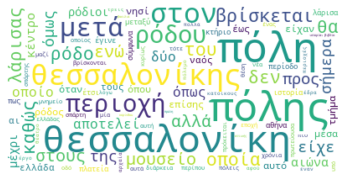

Cluster: 2
Titles
 Θεσσαλία
   Ελλάδα
  Τουρκία
   Γαλλία
 Βρετανία
 Γερμανία
  Ισπανία
     Κίνα
    Φακές


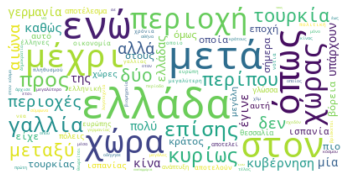

Cluster: 3
Titles
    Μπάσκετ
 Ποδόσφαιρο
      Τένις
    Κολύμπι
    Τρέξιμο


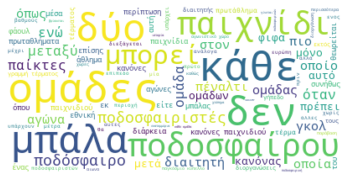

In [8]:
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split() if word not in gr_stop_wd])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()